<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Scatter Plot**


Estimated time needed: **45** minutes


## Overview

In this lab, you will focus on creating and interpreting scatter plots to visualize relationships between variables and trends in the dataset. The provided dataset will be directly loaded into a pandas DataFrame, and various scatter plot-related visualizations will be created to explore developer trends, compensation, and preferences.



## Objectives


In this lab, you will:

- Create and analyze scatter plots to examine relationships between variables.

- Use scatter plots to identify trends and patterns in the dataset.

- Focus on visualizations centered on scatter plots for better data-driven insights.


## Setup: Working with the Database



**Install and import the required libraries**


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install numpy
!pip install scikit-learn

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 152.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 185.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 169.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 158.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 84.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 149.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 112.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 154.7 MB/s eta 0:00:0000:01


#### Step 1: Load the dataset


In [2]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)



### Task 1: Exploring Relationships with Scatter Plots



#### 1. Scatter Plot for Age vs. Job Satisfaction



Visualize the relationship between respondents' age (`Age`) and job satisfaction (`JobSatPoints_6`). Use this plot to identify any patterns or trends.




In [3]:
# Step 1: Map age ranges to approximate midpoints
age_midpoints = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70,
    'Prefer not to say': None
}

# Step 2: Create new numeric age column
df['AgeNumeric'] = df['Age'].map(age_midpoints)

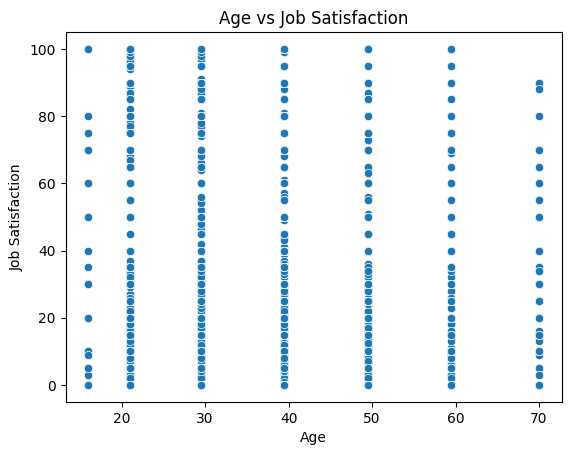

In [6]:
## Write your code here
import matplotlib.pyplot as plt
import seaborn as sns

# Age vs. Job Satisfaction
sns.scatterplot(data=df, x='AgeNumeric', y='JobSatPoints_6')
plt.title('Age vs Job Satisfaction')
plt.xlabel('Age')
plt.ylabel('Job Satisfaction')
plt.show()


#### 2. Scatter Plot for Compensation vs. Job Satisfaction


Explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) using a scatter plot.


In [5]:
#Filter out the extreme outliers in ConvertedCompYearly
percentile_99 = df['ConvertedCompYearly'].quantile(0.99)
df_filtered = df[df['ConvertedCompYearly'] <= percentile_99]


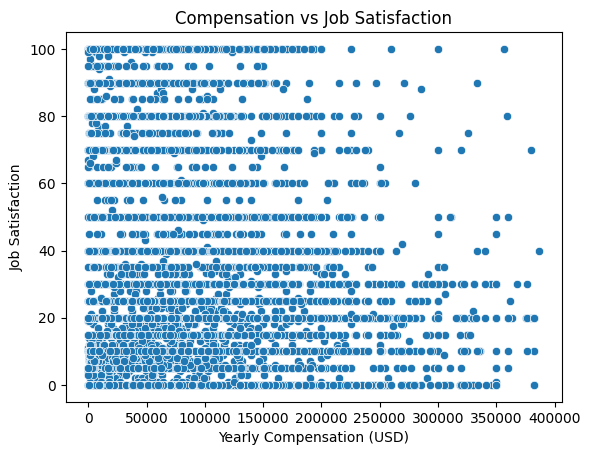

In [7]:
## Write your code here
# Compensation vs. Job Satisfaction (after filtering)
sns.scatterplot(data=df_filtered, x='ConvertedCompYearly', y='JobSatPoints_6')
plt.title('Compensation vs Job Satisfaction')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Job Satisfaction')
plt.show()

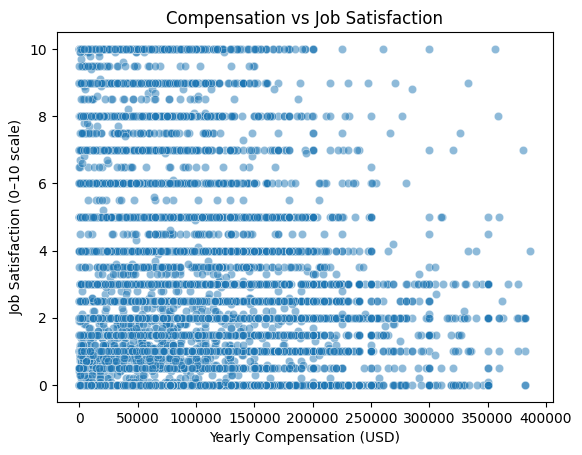

In [13]:
# Normalize job satisfaction
df['JobSat_10pt'] = df['JobSatPoints_6'] / 10

# Filter compensation at 99th percentile
p99 = df['ConvertedCompYearly'].quantile(0.99)
df_filtered = df[df['ConvertedCompYearly'] <= p99]

# Scatter plot
sns.scatterplot(data=df_filtered, x='ConvertedCompYearly', y='JobSat_10pt', alpha=0.5)
plt.title('Compensation vs Job Satisfaction')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Job Satisfaction (0–10 scale)')
plt.show()


/tmp/ipykernel_298/3811339084.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['JobSat_Rounded'] = df_filtered['JobSat_10pt'].round()
/tmp/ipykernel_298/3811339084.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['CompBin'] = (df_filtered['ConvertedCompYearly'] // 50000) * 50000


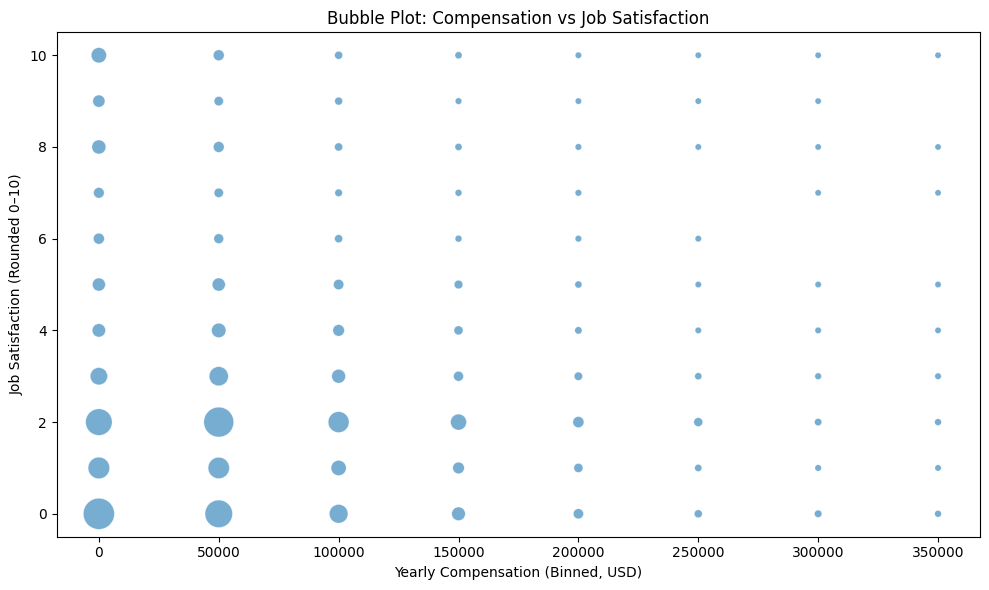

In [15]:
# Round satisfaction to nearest whole number
df_filtered['JobSat_Rounded'] = df_filtered['JobSat_10pt'].round()

# Bin compensation to nearest $25k or $50k
df_filtered['CompBin'] = (df_filtered['ConvertedCompYearly'] // 50000) * 50000

# Group and count
bubble_data = df_filtered.groupby(['CompBin', 'JobSat_Rounded']).size().reset_index(name='Count')

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=bubble_data,
    x='CompBin',
    y='JobSat_Rounded',
    size='Count',
    sizes=(20, 500),  # min to max bubble size
    legend=False,
    alpha=0.6
)
plt.title('Bubble Plot: Compensation vs Job Satisfaction')
plt.xlabel('Yearly Compensation (Binned, USD)')
plt.ylabel('Job Satisfaction (Rounded 0–10)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


### Task 2: Enhancing Scatter Plots


#### 1. Scatter Plot with Trend Line for Age vs. Job Satisfaction



Add a regression line to the scatter plot of Age vs. JobSatPoints_6 to highlight trends in the data.


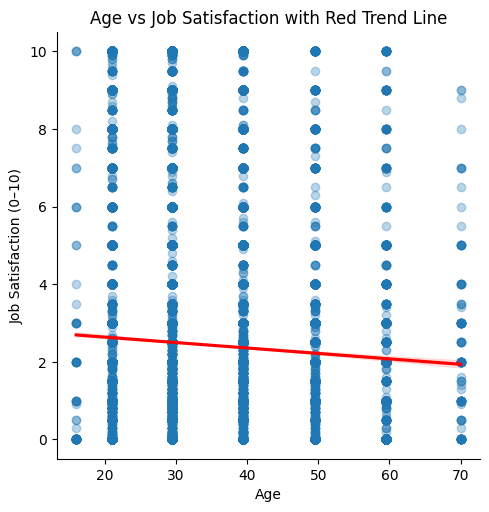

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Normalize job satisfaction
df['JobSat_10pt'] = df['JobSatPoints_6'] / 10

sns.lmplot(
    data=df, 
    x='AgeNumeric', 
    y='JobSat_10pt', 
    scatter_kws={'alpha': 0.3}, 
    line_kws={'color': 'red'}  # change to any matplotlib color name or hex code
)
plt.title('Age vs Job Satisfaction with Red Trend Line')
plt.xlabel('Age')
plt.ylabel('Job Satisfaction (0–10)')
plt.show()


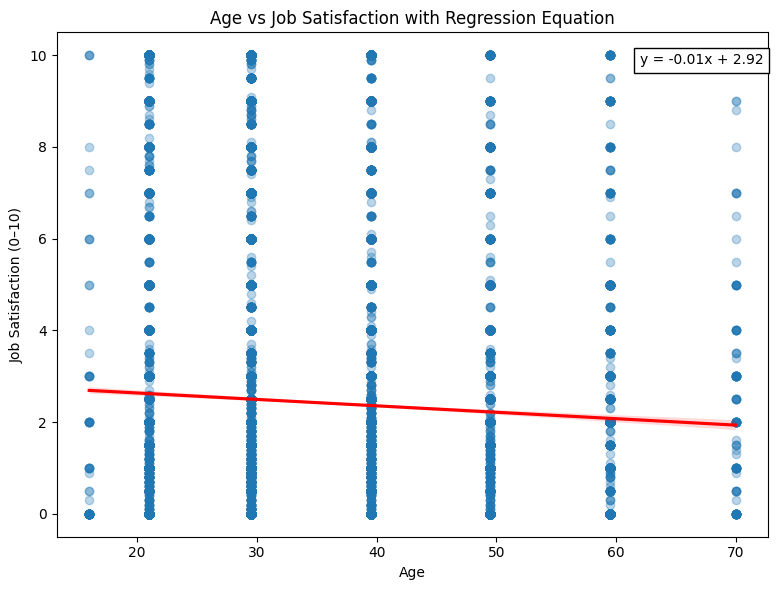

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Drop NA values just in case
df_clean = df[['AgeNumeric', 'JobSat_10pt']].dropna()

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(df_clean['AgeNumeric'], df_clean['JobSat_10pt'])

# Plot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(data=df_clean, x='AgeNumeric', y='JobSat_10pt', scatter_kws={'alpha': 0.3}, line_kws={'color': 'red'})

# Regression equation as a string
#equation = f"y = {slope:.2f}x + {intercept:.2f}\nR² = {r_value**2:.3f}"
equation = f"y = {slope:.2f}x + {intercept:.2f}"
# Annotate the equation on the plot (adjust x and y as needed)
plt.text(62, 9.8, equation, fontsize=10, bbox=dict(facecolor='white', edgecolor='black'))

# Labeling
plt.title('Age vs Job Satisfaction with Regression Equation')
plt.xlabel('Age')
plt.ylabel('Job Satisfaction (0–10)')
plt.tight_layout()
plt.show()


#### 2. Scatter Plot for Age vs. Work Experience


Visualize the relationship between Age (`Age`) and Work Experience (`YearsCodePro`) using a scatter plot.


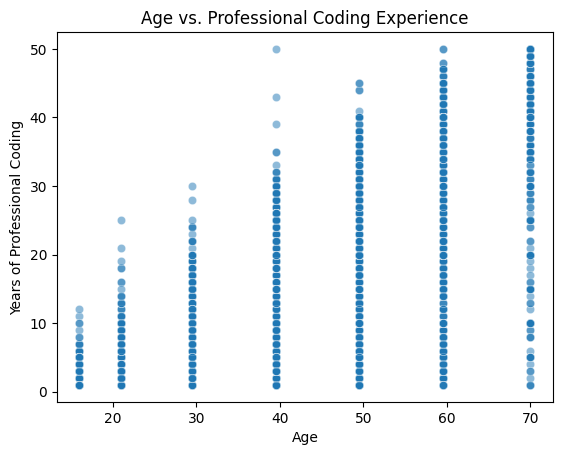

In [27]:
## Write your code here
# Convert YearsCodePro to numeric
df['YearsCodeProNumeric'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Scatter plot
sns.scatterplot(data=df, x='AgeNumeric', y='YearsCodeProNumeric', alpha=0.5)
plt.title('Age vs. Professional Coding Experience')
plt.xlabel('Age')
plt.ylabel('Years of Professional Coding')
plt.show()


### Task 3: Combining Scatter Plots with Additional Features


#### 1. Bubble Plot of Compensation vs. Job Satisfaction with Age as Bubble Size



Create a bubble plot to explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), with bubble size representing age.


/tmp/ipykernel_298/1742040481.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['JobSat_10'] = df_filtered['JobSatPoints_6'] / 10


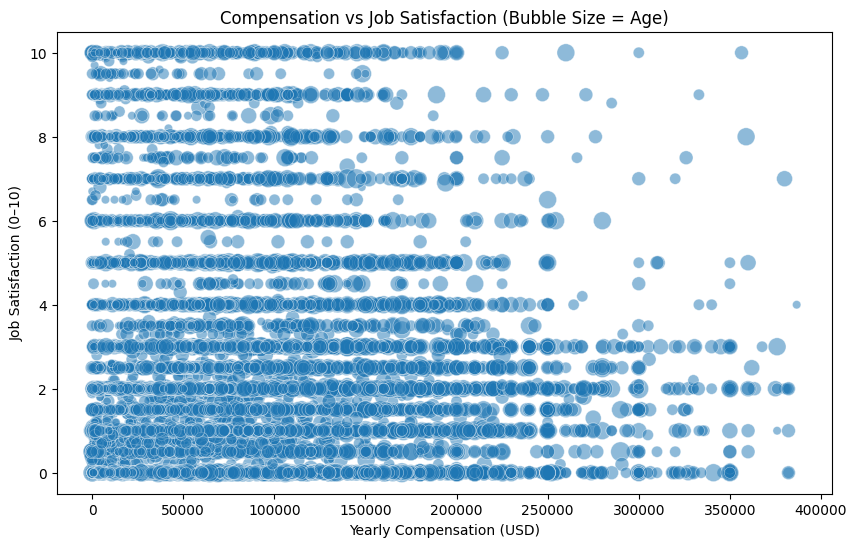

In [28]:
## Write your code here

# Filter to remove extreme compensation outliers
p99 = df['ConvertedCompYearly'].quantile(0.99)
df_filtered = df[df['ConvertedCompYearly'] <= p99]

# Normalize satisfaction to 0–10
df_filtered['JobSat_10'] = df_filtered['JobSatPoints_6'] / 10

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_filtered,
    x='ConvertedCompYearly',
    y='JobSat_10',
    size='AgeNumeric',
    sizes=(20, 200),
    alpha=0.5,
    legend=False
)
plt.title('Compensation vs Job Satisfaction (Bubble Size = Age)')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Job Satisfaction (0–10)')
plt.show()


/tmp/ipykernel_298/359285111.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['CompBin'] = (df_filtered['ConvertedCompYearly'] // 25000) * 25000
/tmp/ipykernel_298/359285111.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['SatBin'] = df_filtered['JobSat_10'].round()


<Axes: xlabel='CompBin', ylabel='SatBin'>

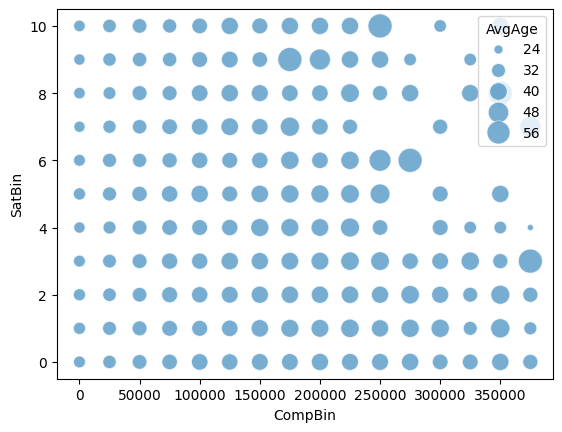

In [31]:
df_filtered['CompBin'] = (df_filtered['ConvertedCompYearly'] // 25000) * 25000
df_filtered['SatBin'] = df_filtered['JobSat_10'].round()

# Average age per bin pair
bubble_data = df_filtered.groupby(['CompBin', 'SatBin'])['AgeNumeric'].mean().reset_index(name='AvgAge')

sns.scatterplot(data=bubble_data, x='CompBin', y='SatBin', size='AvgAge', sizes=(20, 300), alpha=0.6)



/tmp/ipykernel_298/2174177670.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['CompBin'] = (df_filtered['ConvertedCompYearly'] // 25000) * 25000
/tmp/ipykernel_298/2174177670.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['SatBin'] = df_filtered['JobSat_10'].round()


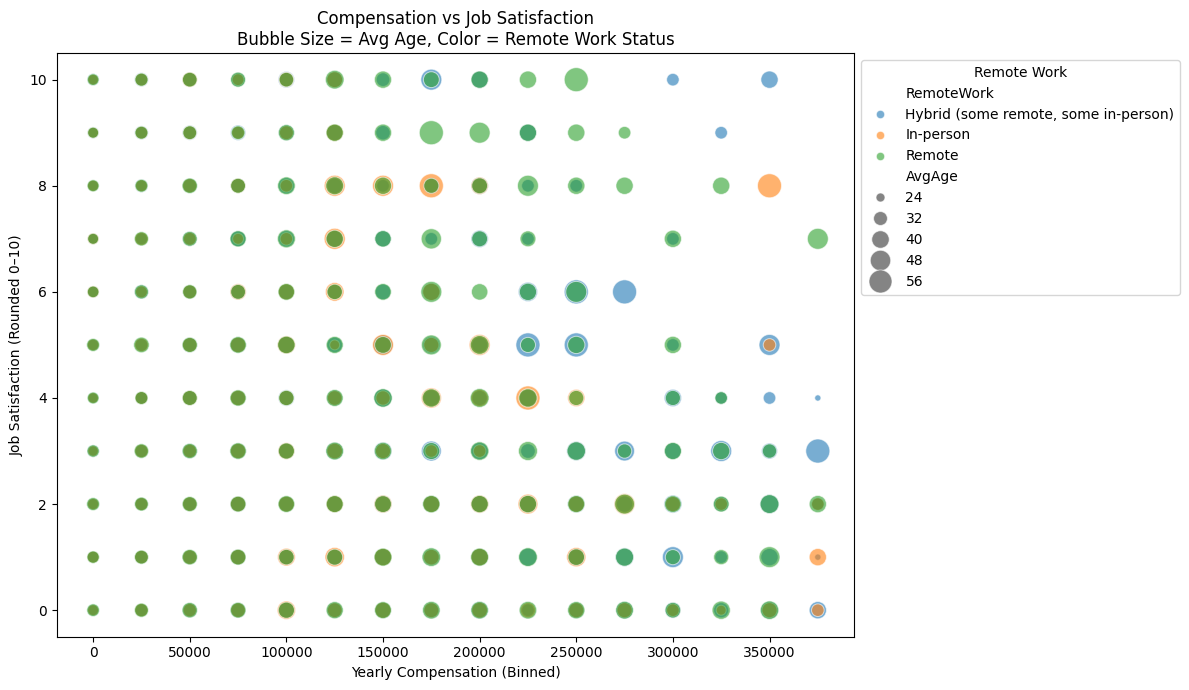

In [32]:
# Ensure JobSat_10, AgeNumeric, and binning is already done
df_filtered['CompBin'] = (df_filtered['ConvertedCompYearly'] // 25000) * 25000
df_filtered['SatBin'] = df_filtered['JobSat_10'].round()

# Group by Compensation, Satisfaction, and RemoteWork
bubble_data = df_filtered.groupby(['CompBin', 'SatBin', 'RemoteWork']).agg(
    AvgAge=('AgeNumeric', 'mean'),
    Count=('AgeNumeric', 'size')
).reset_index()

plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=bubble_data,
    x='CompBin',
    y='SatBin',
    size='AvgAge',
    sizes=(20, 300),
    hue='RemoteWork',
    alpha=0.6
)

plt.title('Compensation vs Job Satisfaction\nBubble Size = Avg Age, Color = Remote Work Status')
plt.xlabel('Yearly Compensation (Binned)')
plt.ylabel('Job Satisfaction (Rounded 0–10)')
plt.legend(title='Remote Work', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


In [ ]:
#Suggestion: add hover feature so can check for multiple categories present

#### 2. Scatter Plot for Popular Programming Languages by Job Satisfaction


Visualize the popularity of programming languages (`LanguageHaveWorkedWith`) against job satisfaction using a scatter plot. Use points to represent satisfaction levels for each language.


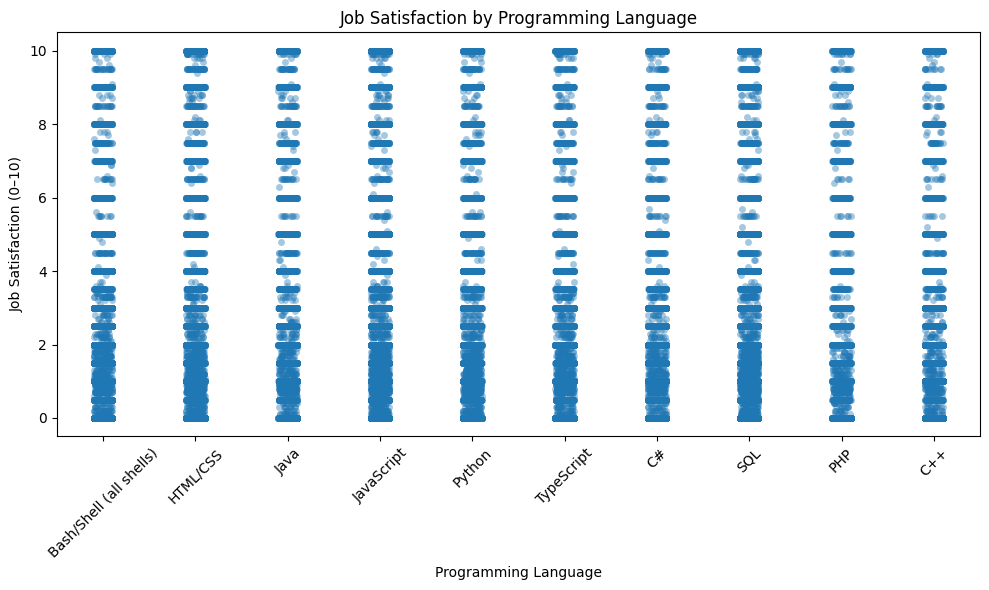

In [36]:
## Write your code here
# Keep only relevant columns
df['JobSat_10'] = df['JobSatPoints_6'] / 10
lang_df = df[['LanguageHaveWorkedWith', 'JobSat_10']].dropna()

# Split the string on semicolon and explode
lang_df['LanguageList'] = lang_df['LanguageHaveWorkedWith'].str.split(';')
lang_df_exploded = lang_df.explode('LanguageList')
lang_df_exploded['LanguageList'] = lang_df_exploded['LanguageList'].str.strip()

top_langs = lang_df_exploded['LanguageList'].value_counts().head(10).index
filtered = lang_df_exploded[lang_df_exploded['LanguageList'].isin(top_langs)]

plt.figure(figsize=(10, 6))
sns.stripplot(
    data=filtered,
    x='LanguageList',
    y='JobSat_10',
    jitter=True,
    alpha=0.4
)
plt.title('Job Satisfaction by Programming Language')
plt.xlabel('Programming Language')
plt.ylabel('Job Satisfaction (0–10)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Task 4: Scatter Plot Comparisons Across Groups


#### 1. Scatter Plot for Compensation vs. Job Satisfaction by Employment Type


Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), categorized by employment type (`Employment`). Use color coding or markers to differentiate between employment types.


/tmp/ipykernel_298/1867959751.py:22: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


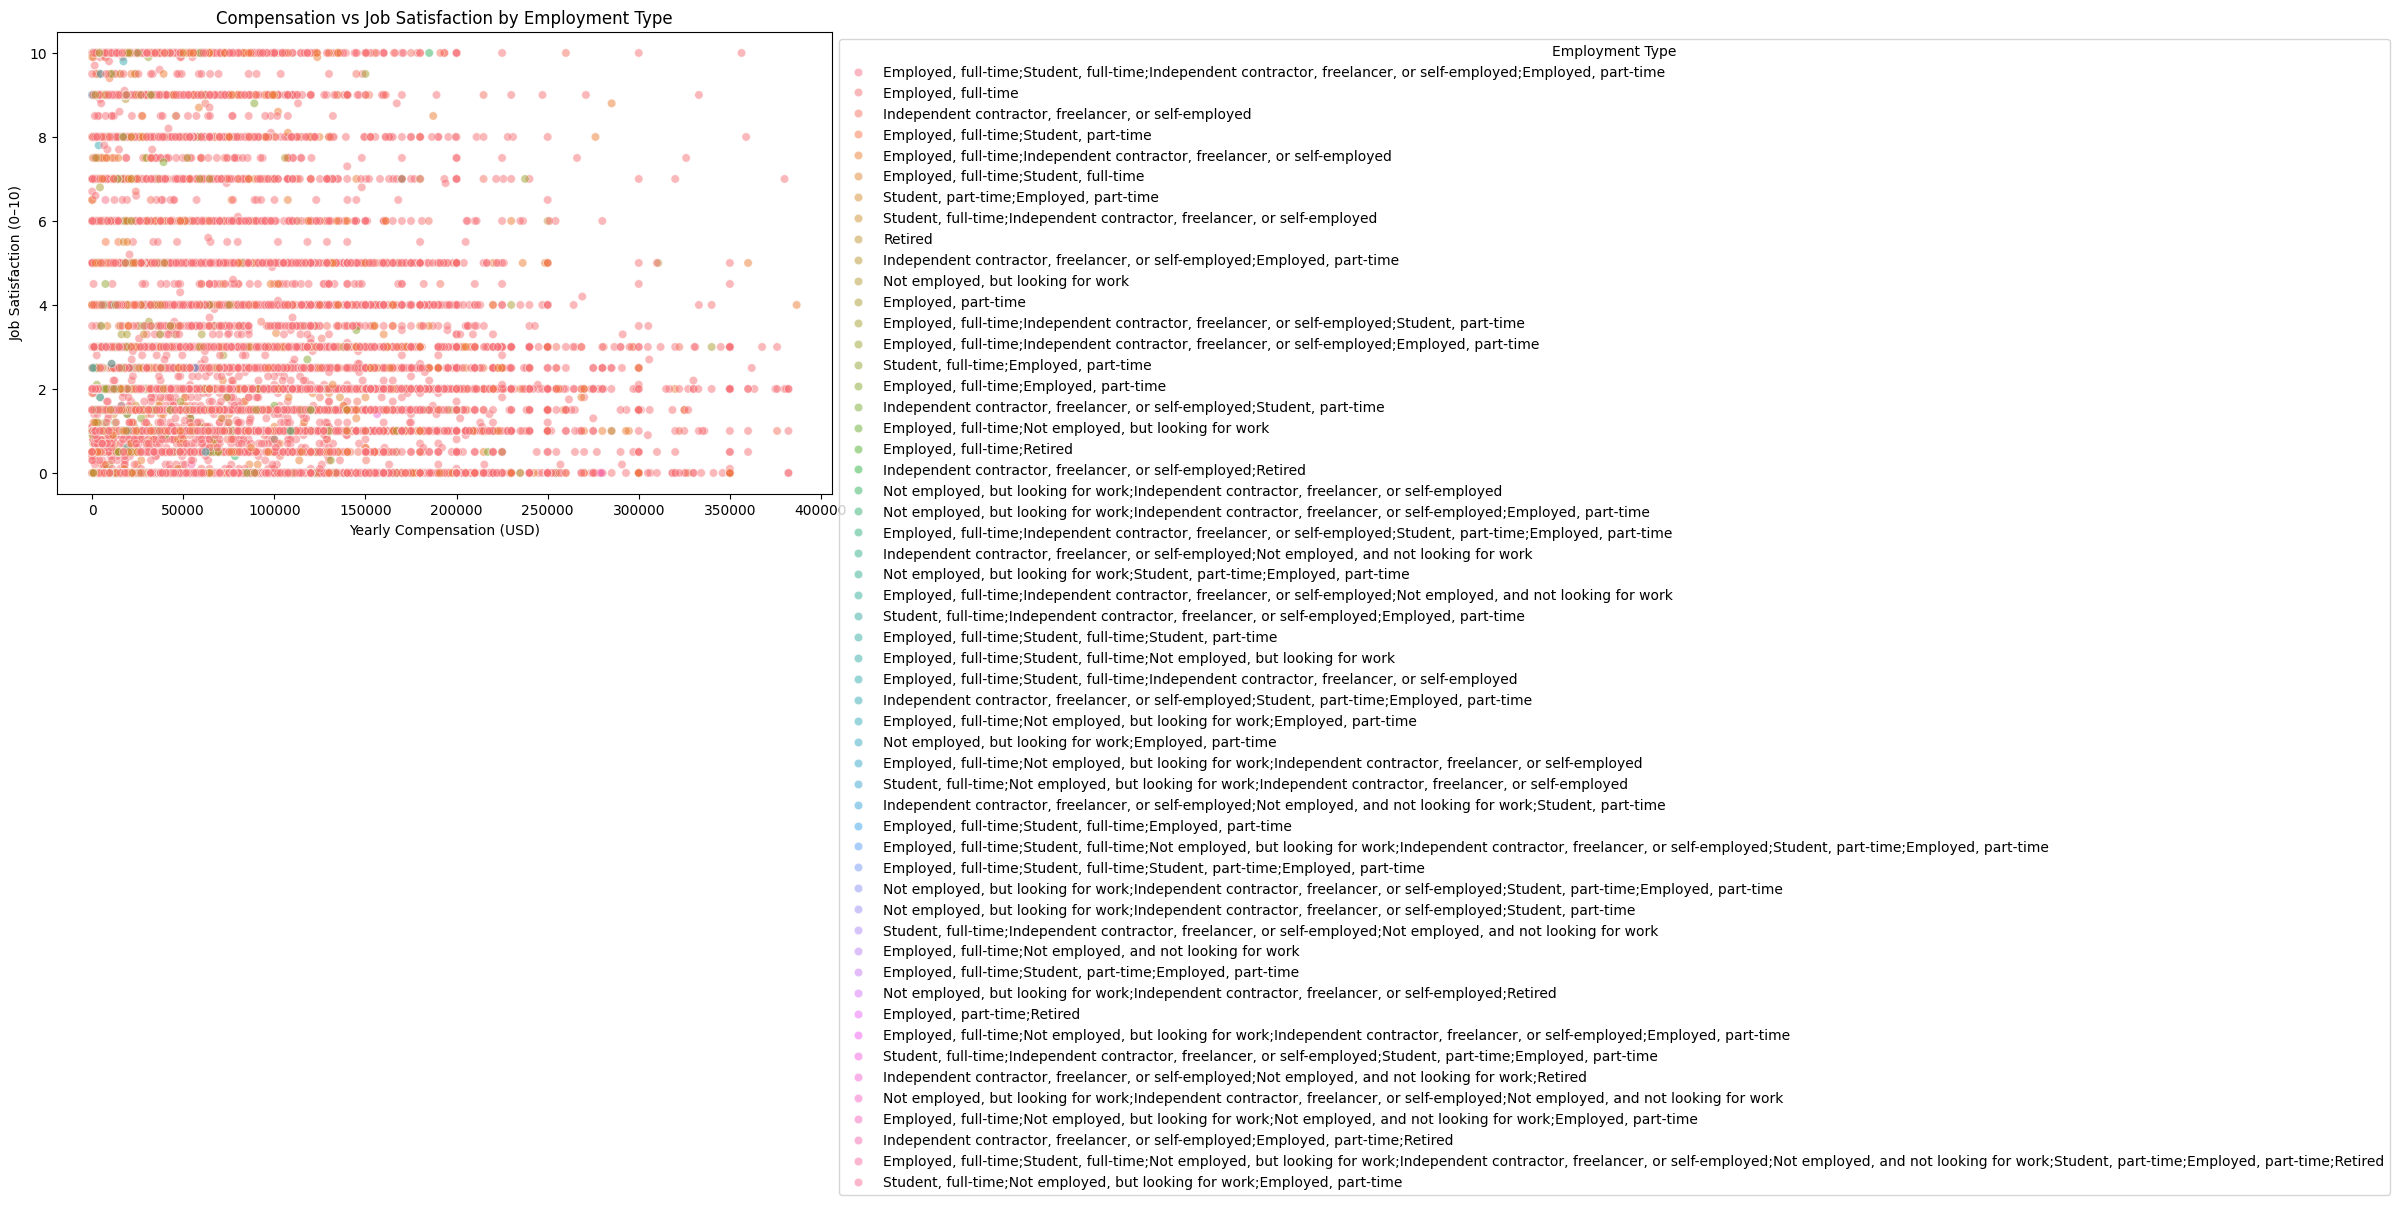

In [37]:
## Write your code here
# Filter to remove outliers
p99 = df['ConvertedCompYearly'].quantile(0.99)
df_filtered = df[df['ConvertedCompYearly'] <= p99].copy()

# Normalize satisfaction
df_filtered['JobSat_10'] = df_filtered['JobSatPoints_6'] / 10

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_filtered,
    x='ConvertedCompYearly',
    y='JobSat_10',
    hue='Employment',   # color by employment type
    alpha=0.5
)
plt.title('Compensation vs Job Satisfaction by Employment Type')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Job Satisfaction (0–10)')
plt.legend(title='Employment Type', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


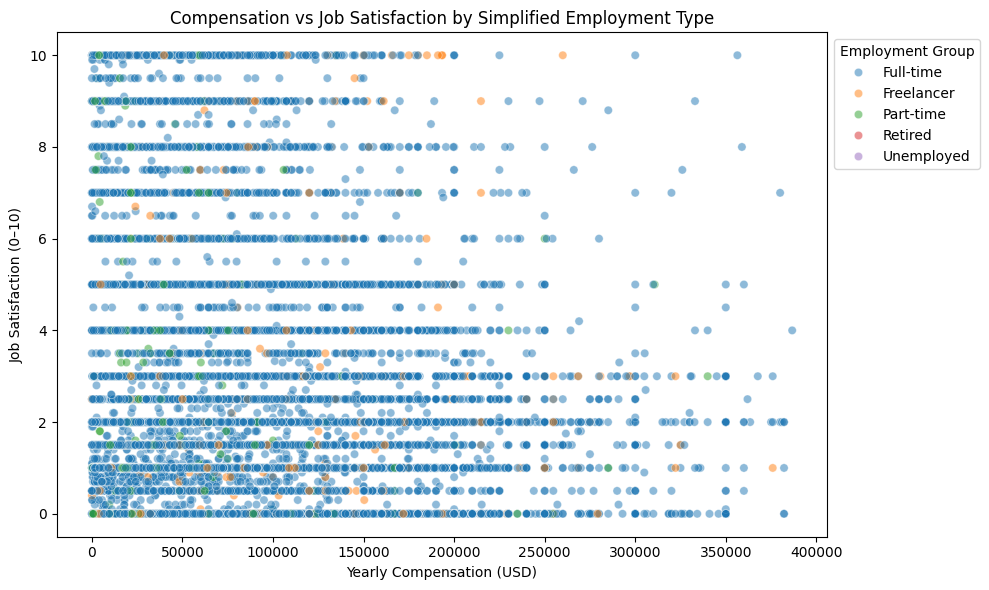

In [38]:
def simplify_employment(emp):
    if pd.isna(emp):
        return 'Unknown'
    emp = emp.lower()
    if 'full-time' in emp:
        return 'Full-time'
    elif 'part-time' in emp:
        return 'Part-time'
    elif 'student' in emp:
        return 'Student'
    elif 'freelancer' in emp or 'self-employed' in emp or 'independent' in emp:
        return 'Freelancer'
    elif 'not employed' in emp:
        return 'Unemployed'
    elif 'retired' in emp:
        return 'Retired'
    else:
        return 'Other'

# Apply simplification
df_filtered['EmploymentGroup'] = df_filtered['Employment'].apply(simplify_employment)

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_filtered,
    x='ConvertedCompYearly',
    y='JobSat_10',
    hue='EmploymentGroup',
    alpha=0.5
)
plt.title('Compensation vs Job Satisfaction by Simplified Employment Type')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Job Satisfaction (0–10)')
plt.legend(title='Employment Group', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


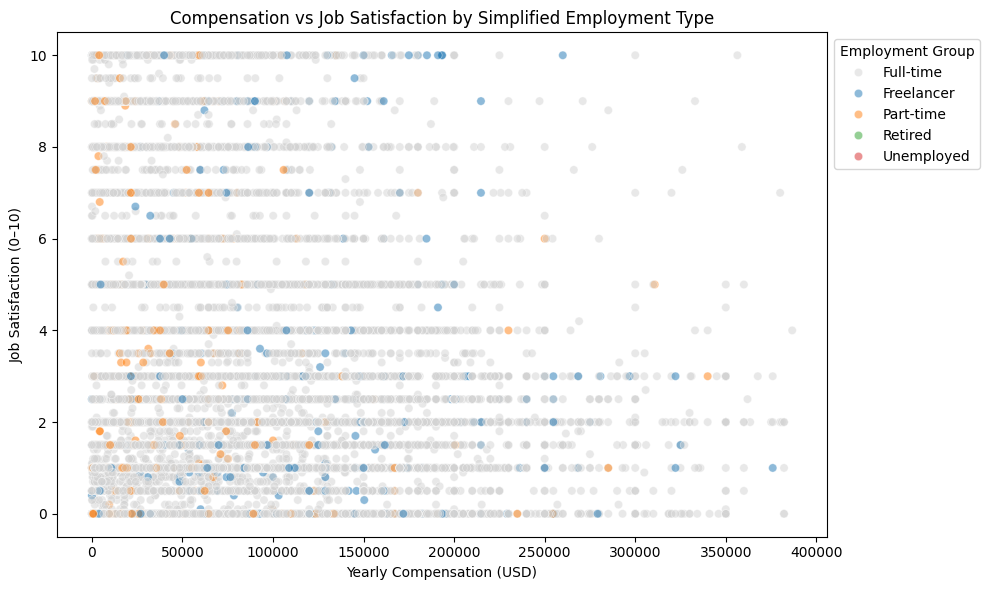

In [39]:
# Define custom palette: full-time is light gray, others are distinct
custom_palette = {
    'Full-time': 'lightgray',
    'Freelancer': '#1f77b4',  # blue
    'Part-time': '#ff7f0e',   # orange
    'Retired': '#2ca02c',     # green
    'Unemployed': '#d62728'   # red
}

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_filtered,
    x='ConvertedCompYearly',
    y='JobSat_10',
    hue='EmploymentGroup',
    palette=custom_palette,
    alpha=0.5
)
plt.title('Compensation vs Job Satisfaction by Simplified Employment Type')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Job Satisfaction (0–10)')
plt.legend(title='Employment Group', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


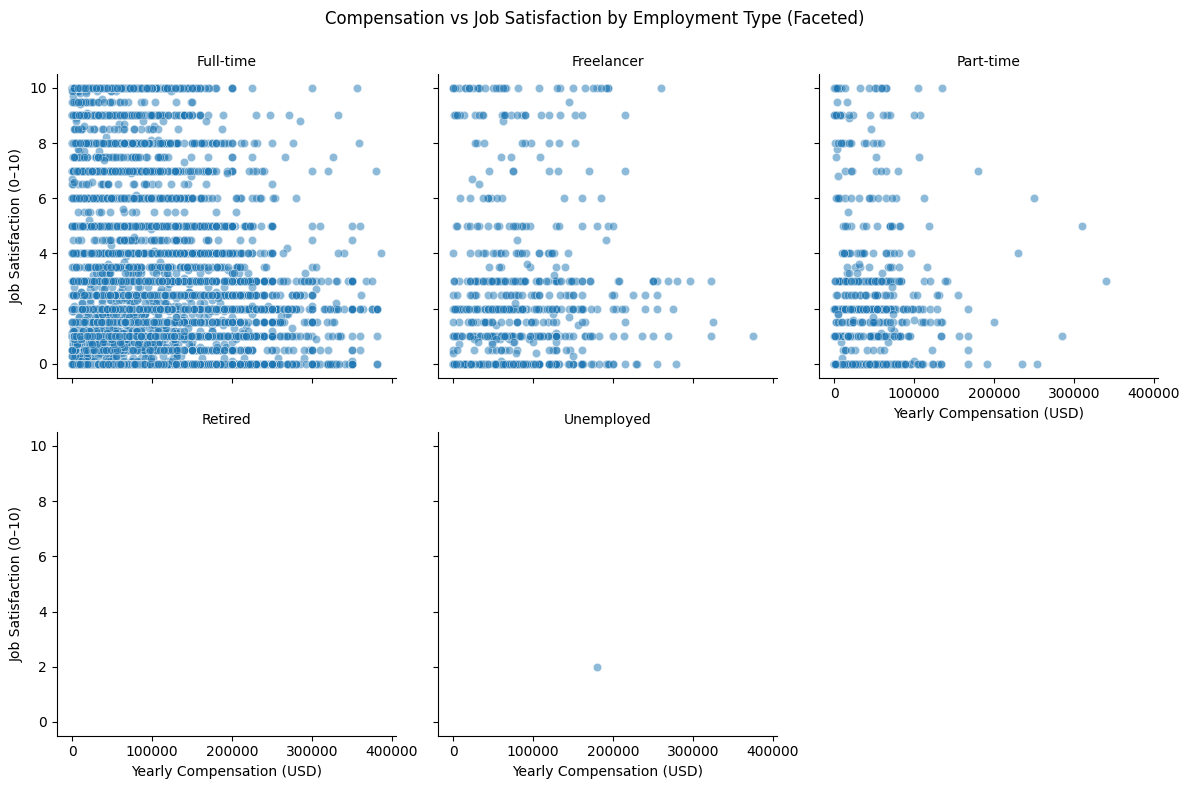

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Optional: limit to just the simplified categories you want to compare
employment_order = ['Full-time', 'Part-time', 'Freelancer', 'Unemployed', 'Retired']
df_subset = df_filtered[df_filtered['EmploymentGroup'].isin(employment_order)]

# Create facet grid
g = sns.FacetGrid(
    df_subset, 
    col='EmploymentGroup', 
    col_wrap=3, 
    height=4, 
    sharex=True, 
    sharey=True
)
g.map_dataframe(
    sns.scatterplot, 
    x='ConvertedCompYearly', 
    y='JobSat_10', 
    alpha=0.5
)
g.set_titles('{col_name}')
g.set_axis_labels("Yearly Compensation (USD)", "Job Satisfaction (0–10)")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Compensation vs Job Satisfaction by Employment Type (Faceted)")
plt.show()


#### 2. Scatter Plot for Work Experience vs. Age Group by Country


Compare work experience (`YearsCodePro`) across different age groups (`Age`) and countries (`Country`). Use colors to represent different countries and markers for age groups.


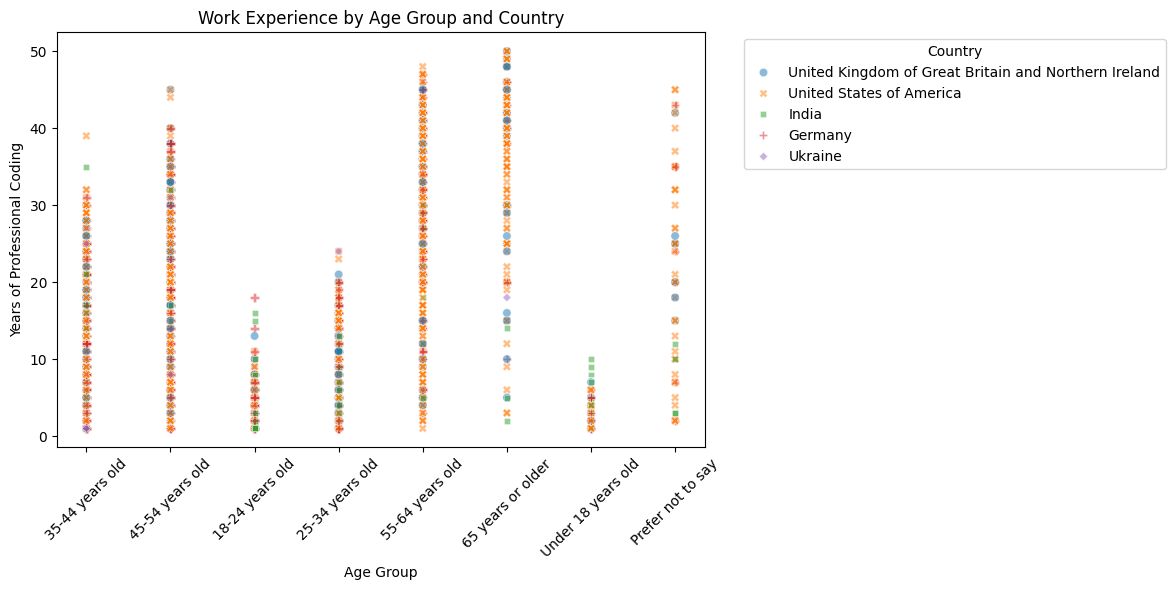

In [43]:
## Write your code here
# Convert work experience to numeric
df['YearsCodeProNum'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Drop missing values
df_exp = df.dropna(subset=['YearsCodeProNum', 'Age', 'Country'])

top_countries = df_exp['Country'].value_counts().head(5).index
df_exp = df_exp[df_exp['Country'].isin(top_countries)]

plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df_exp,
    x='Age',                # categorical axis
    y='YearsCodeProNum',
    hue='Country',          # color by country
    style='Country',        # optional: different marker shapes by country
    alpha=0.5
)
plt.title('Work Experience by Age Group and Country')
plt.xlabel('Age Group')
plt.ylabel('Years of Professional Coding')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), title='Country')
plt.tight_layout()
plt.show()


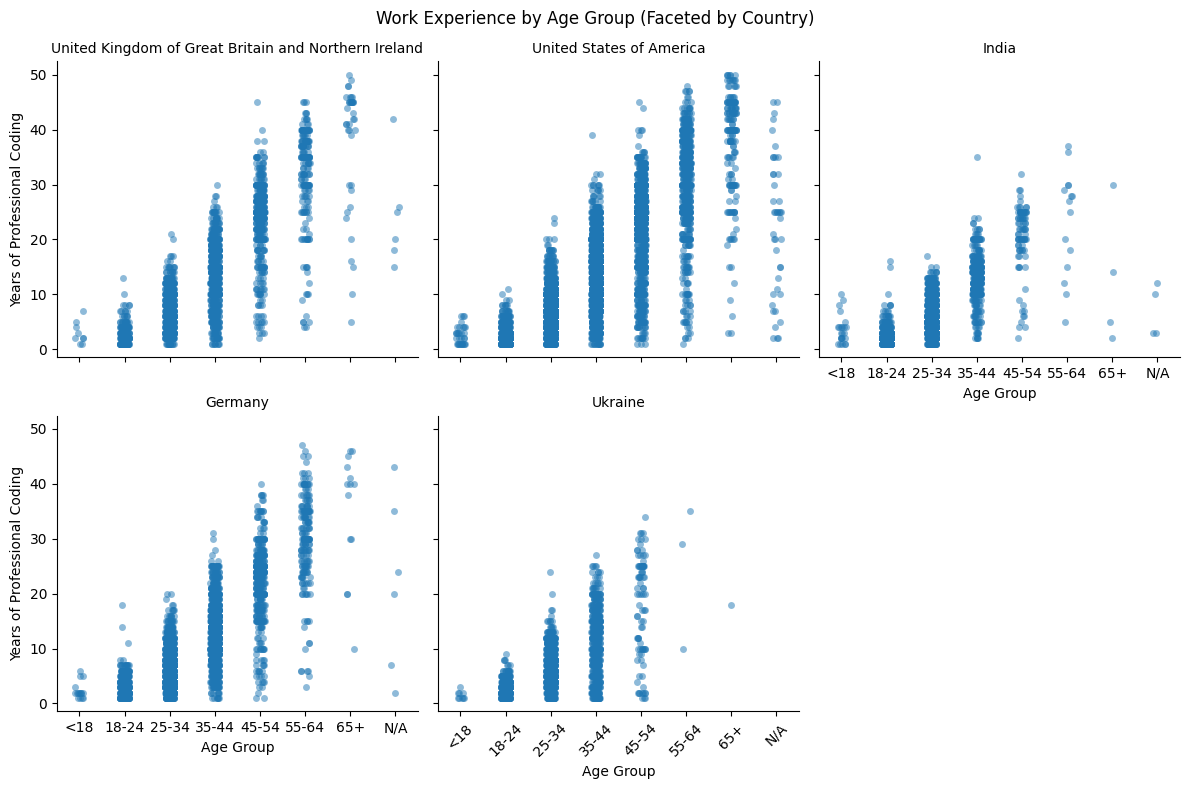

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Map verbose age labels to short, consistent ones
age_label_map = {
    'Under 18 years old': '<18',
    '18-24 years old': '18-24',
    '25-34 years old': '25-34',
    '35-44 years old': '35-44',
    '45-54 years old': '45-54',
    '55-64 years old': '55-64',
    '65 years or older': '65+',
    'Prefer not to say': 'N/A'
}

df_exp['AgeShort'] = df_exp['Age'].map(age_label_map)



# Assuming df_exp is already filtered to include:
# - Valid 'YearsCodeProNum', 'Age', and 'Country'
# - Top 5 countries only

# Set up the facet grid
g = sns.FacetGrid(
    df_exp, 
    col='Country', 
    col_wrap=3, 
    height=4,
    sharey=True
)
g.map_dataframe(
    sns.stripplot, 
    x='AgeShort', 
    y='YearsCodeProNum', 
    order=['<18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+', 'N/A'],
    alpha=0.5,
    jitter=True
)


# Final plot formatting
g.set_axis_labels("Age Group", "Years of Professional Coding")
g.set_titles("{col_name}")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Work Experience by Age Group (Faceted by Country)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Final Step: Review


With these scatter plots, you will have analyzed data relationships across multiple dimensions, including compensation, job satisfaction, employment types, and demographics, to uncover meaningful trends in the developer community.


### Summary


After completing this lab, you will be able to:
- Analyze how numerical variables relate across specific groups, such as employment types and countries.
- Use scatter plots effectively to represent multiple variables with color, size, and markers.
- Gain insights into compensation, satisfaction, and demographic trends using advanced scatter plot techniques.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
